Inicialmente importamos o `pandas`, com delimitador como vírgula. Os dados precisam usar ponto para decimal, exemplo: 0.31416. O argumento `usecols =['Tempo','Axial','Horizontal','Vertical']` diz quais colunas queremos. Se precisar ignorar uma, é só tirar. A coluna "pontos" não é necessária pq o pandas já cria uma coluna index automaticamente. Preciso renomear `[g]` para `g` para o Python não confundir com vetor. O `print(df.dtypes)` é pra retornar o tipo dos dados lidos. Esperamos `float` (decimal).

In [1]:
import pandas as pd
df = pd.read_csv('FormaOnda2.csv', delimiter=',', usecols =['Tempo','Axial','Horizontal','Vertical'])
# df.rename(columns={'[g]':'g'}, inplace=True)
print(df.dtypes)

Tempo         float64
Axial         float64
Horizontal    float64
Vertical      float64
dtype: object


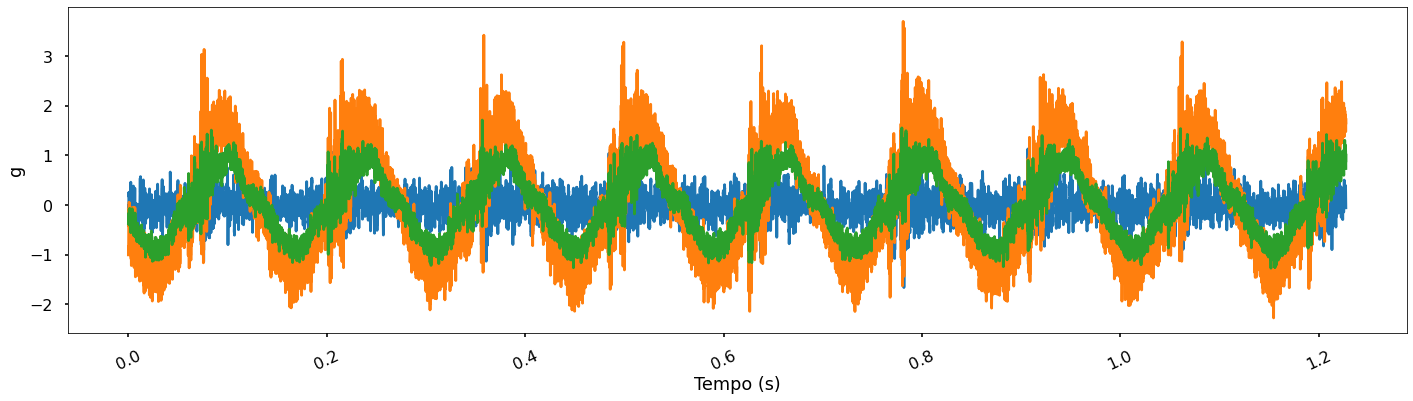

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

plt.figure(figsize = (24, 6))
plt.plot(df['Tempo'], df['Axial'])
plt.plot(df['Tempo'], df['Horizontal'])
plt.plot(df['Tempo'], df['Vertical'])   
plt.xlabel('Tempo (s)')
plt.ylabel('g')

plt.xticks(rotation=25) # Define angulação do número do 
plt.show()

In [3]:
# importar numpy
import numpy as np
from numpy.fft import fft, ifft



X1 = fft(df['Axial']) # FFT
X2 = fft(df['Horizontal']) # FFT
X3 = fft(df['Vertical']) # FFT
N = len(df['Tempo']) # número de pontos
n = np.arange(N) #cria um vetor de tamanho N para ser usado como a coluna "pontos" do CSV
interval = df['Tempo'][N-1] - df['Tempo'][0] # intervalo da amostra
sr = N/interval # sampling rate
T = N/sr # período
freq = n/T
t=df['Tempo']

In [4]:
data = { 'Frequencia': freq, 'Axial': np.abs(X1), 'Horizontal': np.abs(X2), 'Vertical' : np.abs(X3)}
result_df = pd.DataFrame(data)
result_df.to_csv('result_jupyter.csv')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


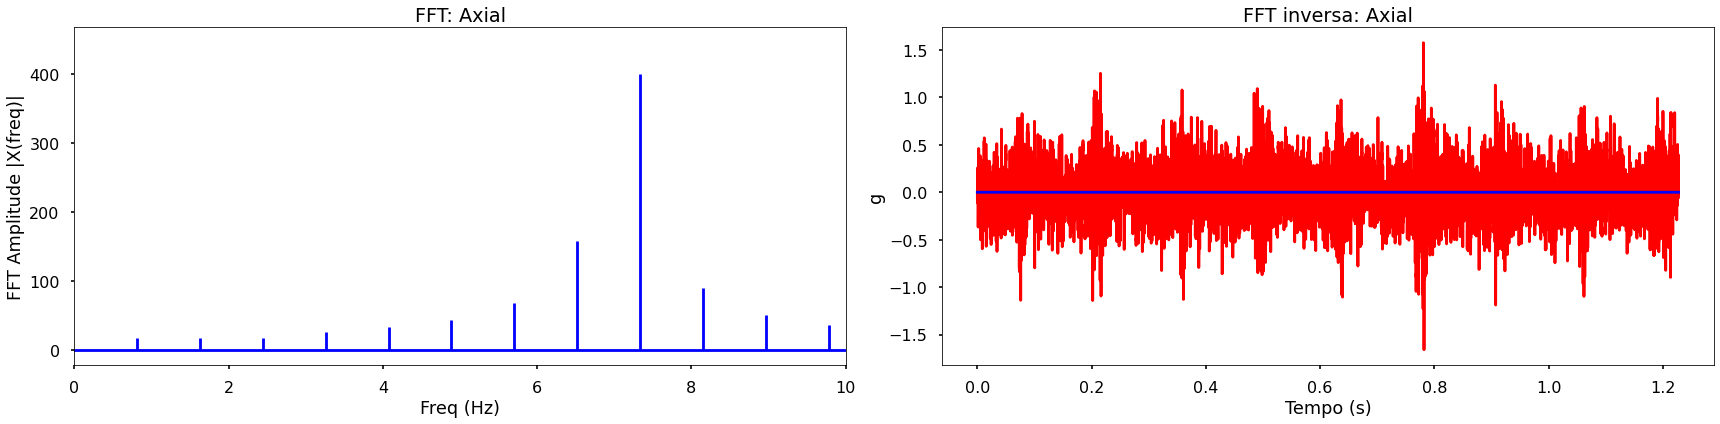

In [5]:
# Plot Axial

plt.figure(figsize = (24, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X1), linefmt='b', markerfmt=" ", basefmt="-b")
plt.title('FFT: Axial')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X1), 'r')
plt.plot(t, ifft(X1)-df['Axial'], 'b')
plt.title('FFT inversa: Axial')
plt.xlabel('Tempo (s)')
plt.ylabel('g')
plt.tight_layout()
plt.show()

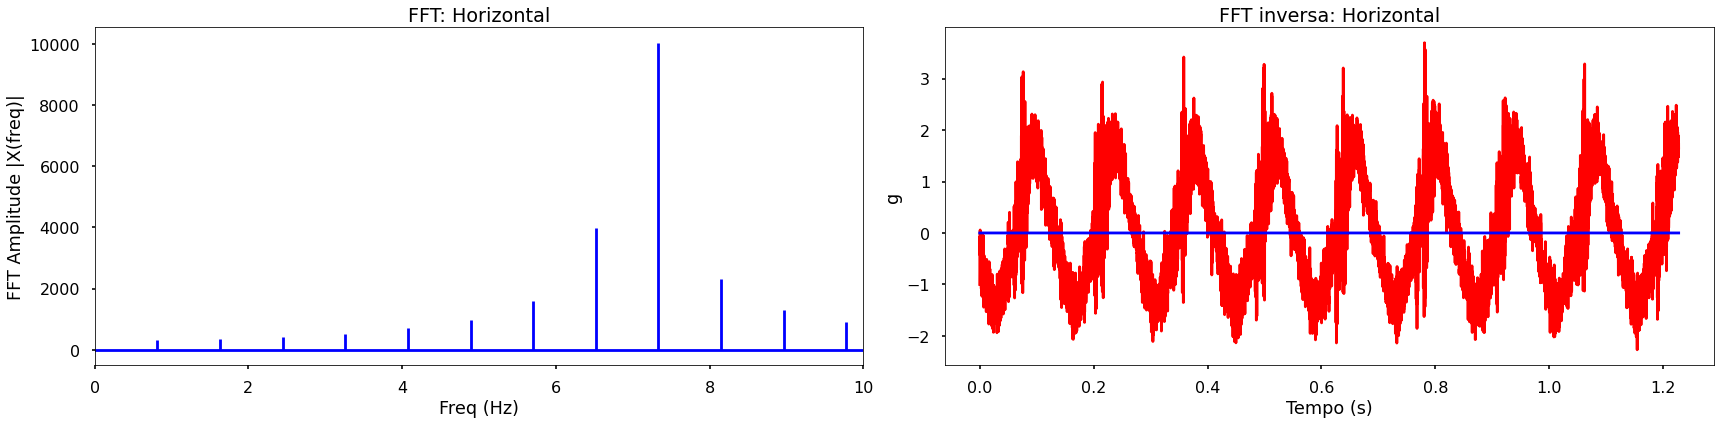

In [6]:
# Plot Horizontal

plt.figure(figsize = (24, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X2), linefmt='b', markerfmt=" ", basefmt="-b")
plt.title('FFT: Horizontal')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X2), 'r')
plt.plot(t, ifft(X2)-df['Horizontal'], 'b')
plt.title('FFT inversa: Horizontal')
plt.xlabel('Tempo (s)')
plt.ylabel('g')
plt.tight_layout()
plt.show()

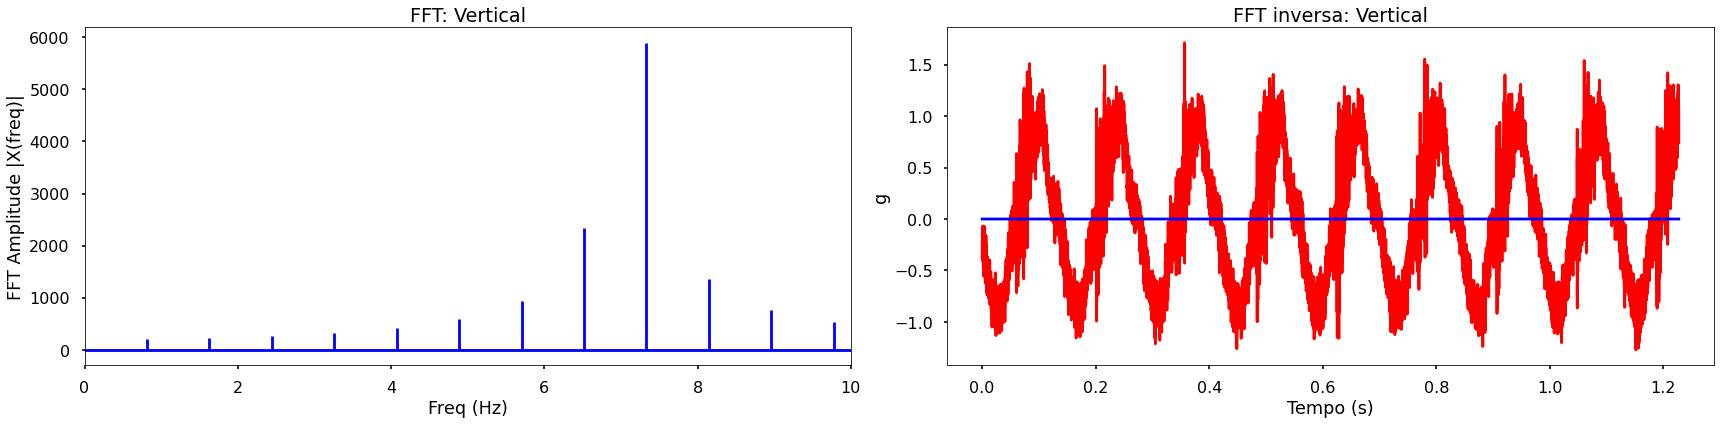

In [7]:
# Plot Vertical

plt.figure(figsize = (24, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X3), linefmt='b', markerfmt=" ", basefmt="-b")
plt.title('FFT: Vertical')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X3), 'r')
plt.plot(t, ifft(X3)-df['Vertical'], 'b')
plt.title('FFT inversa: Vertical')
plt.xlabel('Tempo (s)')
plt.ylabel('g')
plt.tight_layout()
plt.show()